# 1) Preparación previa

### <u>Carga de librerías</u>

In [1]:
%%capture [--no-stderr]

import pandas as pd
import numpy as np
from tqdm import tqdm, tqdm_pandas
tqdm_pandas(tqdm())
import random

from pyproj import Geod
from scipy.stats import pearsonr
from scipy.stats import spearmanr

# from geopy.distance import distance
# from shapely.geometry import Point
# import geopandas as gpd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#from sklearn.preprocessing import StandardScaler
#from IPython.display import display, Markdown

### <u>Carga de datasets</u>

In [2]:
dataset = pd.read_csv("dataset.csv", low_memory = False)
dataset

,año,genero_usuario,codigo_origen,nombre_origen,long_estacion_origen,lat_estacion_origen,codigo_destino,nombre_destino,long_estacion_destino,lat_estacion_destino,id_usuario,minutos
0,2015,M,25,plaza guemes,-58.416065,-34.589521,29,parque centenario,-58.434577,-34.608459,NaN,26
1,2015,F,17,plaza almagro,-58.418832,-34.606399,25,plaza guemes,-58.416065,-34.589521,NaN,57
2,2015,M,17,plaza almagro,-58.418832,-34.606399,25,plaza guemes,-58.416065,-34.589521,NaN,3
3,2015,M,29,parque centenario,-58.434577,-34.608459,25,plaza guemes,-58.416065,-34.589521,NaN,4
4,2015,M,29,parque centenario,-58.434577,-34.608459,25,plaza guemes,-58.416065,-34.589521,NaN,9
...,...,...,...,...,...,...,...,...,...,...,...,...
13969245,2021,F,292,plaza bolivia,-58.436037,-34.563465,44,ecoparque,-58.414595,-34.575485,62246.0,12
13969246,2021,F,79,azucena villaflor,-58.363969,-34.611721,168,estados unidos,-58.381283,-34.618620,445201.0,23
13969247,2021,M,79,azucena villaflor,-58.363969,-34.611721,8,congreso,-58.389253,-34.609930,554162.0,19
13969248,2021,F,79,azucena villaflor,-58.363969,-34.611721,75,plaza primero de mayo,-58.398905,-34.612124,51005.0,17


In [3]:
dataset_usuarios_2020 = pd.read_csv("../Datasets/usuarios_ecobici_2020.csv")
dataset_usuarios_2019 = pd.read_csv("../Datasets/usuarios_ecobici_2019.csv")
dataset_usuarios_2018 = pd.read_csv("../Datasets/usuarios-ecobici-2018.csv").rename(columns={'usuario_id': 'id_usuario', 'usuario_sexo': 'genero_usuario', 'usuario_edad': 'edad_usuario'})
dataset_usuarios_2017 = pd.read_csv("../Datasets/usuarios-ecobici-2017.csv").rename(columns={'usuario_id': 'id_usuario', 'usuario_sexo': 'genero_usuario', 'usuario_edad': 'edad_usuario'})
dataset_usuarios_2016 = pd.read_csv("../Datasets/usuarios-ecobici-2016.csv").rename(columns={'usuario_id': 'id_usuario', 'usuario_sexo': 'genero_usuario', 'usuario_edad': 'edad_usuario'})
dataset_usuarios_2015 = pd.read_csv("../Datasets/usuarios-ecobici-2015.csv").rename(columns={'usuario_id': 'id_usuario', 'usuario_sexo': 'genero_usuario', 'usuario_edad': 'edad_usuario'})
dataset_usuarios = pd.concat([dataset_usuarios_2015, dataset_usuarios_2016, dataset_usuarios_2017, dataset_usuarios_2018, dataset_usuarios_2019, dataset_usuarios_2020])
dataset_usuarios

,id_usuario,genero_usuario,edad_usuario,fecha_alta,hora_alta
0,7682,M,45.0,2015-02-28,17:32:55.087
1,19577,M,47.0,2015-02-28,17:33:12.227
2,108635,M,26.0,2015-02-28,17:35:13.800
3,129948,M,29.0,2015-02-28,17:35:42.780
4,129949,M,24.0,2015-02-28,17:35:42.780
...,...,...,...,...,...
5235,489,M,29.0,20-02-19,1:44:00 PM
5236,306,F,35.0,03-10-20,12:16:00 PM
5237,206,M,46.0,02-10-20,12:57:00 PM
5238,202,M,22.0,28-09-20,2:45:00 PM


In [4]:
dataset_usuarios.isnull().sum()

id_usuario          0
genero_usuario    751
edad_usuario      633
fecha_alta          1
hora_alta           1
dtype: int64

In [5]:
dataset_usuarios.dropna(inplace = True)
dataset_usuarios

,id_usuario,genero_usuario,edad_usuario,fecha_alta,hora_alta
0,7682,M,45.0,2015-02-28,17:32:55.087
1,19577,M,47.0,2015-02-28,17:33:12.227
2,108635,M,26.0,2015-02-28,17:35:13.800
3,129948,M,29.0,2015-02-28,17:35:42.780
4,129949,M,24.0,2015-02-28,17:35:42.780
...,...,...,...,...,...
5235,489,M,29.0,20-02-19,1:44:00 PM
5236,306,F,35.0,03-10-20,12:16:00 PM
5237,206,M,46.0,02-10-20,12:57:00 PM
5238,202,M,22.0,28-09-20,2:45:00 PM


# 2) Gráficos

## <u>1er gráfico: análisis de género</u>

En primer lugar, se procede a definir los datos a utilizar, agrupando los totales según la variable que corresponda.

#### A) Recorridos según género

In [6]:
round(dataset.genero_usuario.value_counts(normalize = True)*100,3)

M    71.206
F    28.793
N     0.001
Name: genero_usuario, dtype: float64

Debido a la pequeña propoción de la respuesta N y a que solo se encuentra en 2 de los 7 años, se dejará de lado en el gráfico.

In [7]:
dataset_genero = dataset.loc[dataset["genero_usuario"] != "N",:]
dataset_genero

,año,genero_usuario,codigo_origen,nombre_origen,long_estacion_origen,lat_estacion_origen,codigo_destino,nombre_destino,long_estacion_destino,lat_estacion_destino,id_usuario,minutos
0,2015,M,25,plaza guemes,-58.416065,-34.589521,29,parque centenario,-58.434577,-34.608459,NaN,26
1,2015,F,17,plaza almagro,-58.418832,-34.606399,25,plaza guemes,-58.416065,-34.589521,NaN,57
2,2015,M,17,plaza almagro,-58.418832,-34.606399,25,plaza guemes,-58.416065,-34.589521,NaN,3
3,2015,M,29,parque centenario,-58.434577,-34.608459,25,plaza guemes,-58.416065,-34.589521,NaN,4
4,2015,M,29,parque centenario,-58.434577,-34.608459,25,plaza guemes,-58.416065,-34.589521,NaN,9
...,...,...,...,...,...,...,...,...,...,...,...,...
13969245,2021,F,292,plaza bolivia,-58.436037,-34.563465,44,ecoparque,-58.414595,-34.575485,62246.0,12
13969246,2021,F,79,azucena villaflor,-58.363969,-34.611721,168,estados unidos,-58.381283,-34.618620,445201.0,23
13969247,2021,M,79,azucena villaflor,-58.363969,-34.611721,8,congreso,-58.389253,-34.609930,554162.0,19
13969248,2021,F,79,azucena villaflor,-58.363969,-34.611721,75,plaza primero de mayo,-58.398905,-34.612124,51005.0,17


In [8]:
dataset_genero = dataset_genero.groupby("año").genero_usuario
totales_x_año_genero = dataset_genero.value_counts()
totales_x_año_genero

año   genero_usuario
2015  M                  383694
      F                  110761
2016  M                  436501
      F                  156865
2017  M                  778689
      F                  265738
2018  M                 1844444
      F                  723318
2019  M                 4487173
      F                 1739296
2020  M                 1282362
      F                  643553
2021  M                  734125
      F                  382644
Name: genero_usuario, dtype: int64

In [9]:
porcentaje_x_año_genero = dataset_genero.value_counts(normalize = True).round(3)*100
porcentaje_x_año_genero

año   genero_usuario
2015  M                 77.6
      F                 22.4
2016  M                 73.6
      F                 26.4
2017  M                 74.6
      F                 25.4
2018  M                 71.8
      F                 28.2
2019  M                 72.1
      F                 27.9
2020  M                 66.6
      F                 33.4
2021  M                 65.7
      F                 34.3
Name: genero_usuario, dtype: float64

In [10]:
totales_x_año_genero_rename = totales_x_año_genero.rename_axis(["año","genero"]).reset_index(name = "totales")
porcentaje_x_año_genero_rename = porcentaje_x_año_genero.rename_axis(["año","genero"]).reset_index(name = "porcentaje")

df_genero_x_año = pd.merge(totales_x_año_genero_rename, porcentaje_x_año_genero_rename, how = "outer")
df_genero_x_año

,año,genero,totales,porcentaje
0,2015,M,383694,77.6
1,2015,F,110761,22.4
2,2016,M,436501,73.6
3,2016,F,156865,26.4
4,2017,M,778689,74.6
5,2017,F,265738,25.4
6,2018,M,1844444,71.8
7,2018,F,723318,28.2
8,2019,M,4487173,72.1
9,2019,F,1739296,27.9


In [11]:
totales_gpa_m = df_genero_x_año[df_genero_x_año["genero"] == "M"]
totales_gpa_f = df_genero_x_año[df_genero_x_año["genero"] == "F"]

#### B) Usuarios según género

In [12]:
dataset_usuarios_genero = dataset.dropna(subset = ["id_usuario"]).drop_duplicates(subset = ["id_usuario"])
dataset_usuarios_genero

,año,genero_usuario,codigo_origen,nombre_origen,long_estacion_origen,lat_estacion_origen,codigo_destino,nombre_destino,long_estacion_destino,lat_estacion_destino,id_usuario,minutos
2132248,2018,M,45,uruguay,-58.386913,-34.601616,183,virrey cevallos,-58.389692,-34.615638,5453.0,19
2132249,2018,M,189,posadas,-58.385586,-34.588475,110,guardia vieja,-58.415459,-34.601761,673.0,26
2132250,2018,F,50,hospital rivadavia,-58.401148,-34.583677,31,padilla,-58.439709,-34.603162,179119.0,27
2132251,2018,M,111,macacha guemes,-58.363000,-34.604969,54,acuna de figueroa,-58.421705,-34.598222,400147.0,48
2132252,2018,F,111,macacha guemes,-58.363000,-34.604969,54,acuna de figueroa,-58.421705,-34.598222,400156.0,49
...,...,...,...,...,...,...,...,...,...,...,...,...
13968703,2021,F,249,balbin,-58.465525,-34.561547,399,garcia del rio,-58.476643,-34.550073,735974.0,17
13968705,2021,F,18,independencia,-58.380481,-34.617373,18,independencia,-58.380481,-34.617373,650353.0,3
13968806,2021,M,116,hospital aleman,-58.402598,-34.592104,58,ministro carranza,-58.434626,-34.575190,735978.0,19
13968819,2021,M,282,tronador,-58.466630,-34.583990,281,villa urquiza,-58.486805,-34.573776,735984.0,19


In [13]:
dataset_usuarios_genero = dataset_usuarios_genero.genero_usuario.value_counts().rename_axis('genero').reset_index(name='totales')
dataset_usuarios_genero

,genero,totales
0,M,374579
1,F,187773
2,N,5


In [14]:
dataset_usuarios_genero = dataset_usuarios_genero.loc[dataset_usuarios_genero.genero != "N",:]

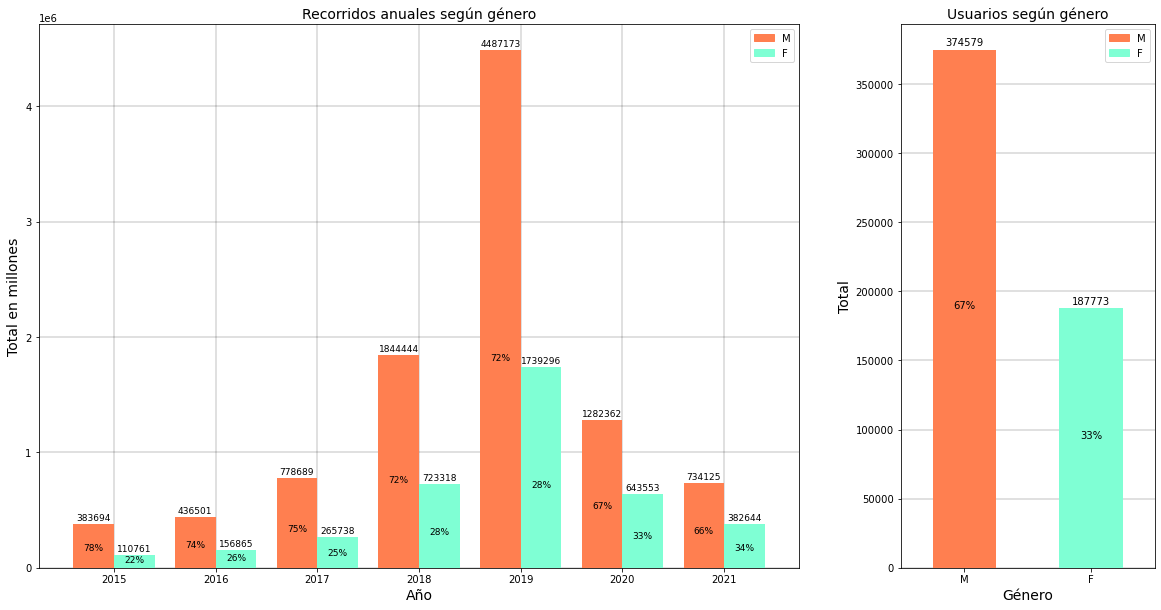

In [15]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (20,10), gridspec_kw={'width_ratios': [3, 1]})

# Se define la paleta de colores a utilizar:
colors = {'M':'coral', 'F':'aquamarine'} 

# Axis 1 = recorridos según género
#ax1.plot(totales_gpa_m["año"], totales_gpa_m["totales"], color='black', linewidth=2, label = "Total")
#ax1.plot(totales_gpa_f["año"], totales_gpa_f["totales"], color='black', linewidth=2, label = "Total")
width = 0.4
ax1.bar(totales_gpa_m["año"], totales_gpa_m["totales"], -width, color= colors["M"], align = "edge")
ax1.bar(totales_gpa_m["año"], totales_gpa_f["totales"], width, color= colors["F"], align = "edge")

# Propiedades
ax1.set_axisbelow(True)
ax1.set_title('Recorridos anuales según género', fontsize=14)
ax1.set_ylabel('Total en millones', fontsize=14)
ax1.set_xlabel('Año', fontsize=14)
ax1.grid(which='major', axis='y', color='black', lw=0.4, alpha=0.6)
ax1.grid(which='major', axis='x', color='black', lw=0.4, alpha=0.6)        

# Datos de barras
for p in ax1.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax1.annotate(f'{height}', (x + width/2, y + height+30000), ha='center', fontsize = 9)
    ax1.annotate(f'{round(100/df_genero_x_año.loc[df_genero_x_año.año == x, "totales"].sum()*height)}%', (x + width/2, y + height*0.4), ha='center', fontsize = 9)
    
# Leyenda
labels = list(colors.keys())
handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
legend = ax1.legend(handles, labels, fontsize = 10)



# Axis 2 = total de usuarios según género
plt.sca(ax2) 
dataset_usuarios_genero.plot(ax = ax2, kind = "bar", width = 0.5, color = ["coral", "aquamarine"], x="genero", y="totales", rot = 0)

# Propiedades
ax2.set_axisbelow(True)
ax2.set_title('Usuarios según género', fontsize=14)
ax2.set_xlabel("Género", fontsize=14)
ax2.set_ylabel("Total", fontsize=14)
ax2.grid(which='major', axis='y', color='black', lw=0.4, alpha=0.6)

# Datos de barras
for p in ax2.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax2.annotate(f'{height}', (x + width/2, y + height + 3000), ha='center')
    ax2.annotate(f'{round(100/dataset_usuarios_genero.totales.sum()*height)}%', (x + width/2, y + height*0.5), ha='center')

# Leyenda
labels = list(colors.keys())
handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
legend = ax2.legend(handles, labels, fontsize = 10)

plt.savefig("Análisis de género.jpg", dpi = 300)

## <u>2do gráfico: análisis de duración y distancia</u>

In [16]:
wgs84_geod = Geod(ellps='WGS84')

def distancia(lat1, lon1, lat2, lon2):
  az12, az21, dist = wgs84_geod.inv(lon1,lat1,lon2,lat2)
  return dist

dataset['distancia'] = distancia(dataset['lat_estacion_origen'].tolist(), dataset['long_estacion_origen'].tolist(), dataset['lat_estacion_destino'].tolist(), dataset['long_estacion_destino'].tolist())

In [17]:
dataset

,año,genero_usuario,codigo_origen,nombre_origen,long_estacion_origen,lat_estacion_origen,codigo_destino,nombre_destino,long_estacion_destino,lat_estacion_destino,id_usuario,minutos,distancia
0,2015,M,25,plaza guemes,-58.416065,-34.589521,29,parque centenario,-58.434577,-34.608459,NaN,26,2701.351803
1,2015,F,17,plaza almagro,-58.418832,-34.606399,25,plaza guemes,-58.416065,-34.589521,NaN,57,1889.437650
2,2015,M,17,plaza almagro,-58.418832,-34.606399,25,plaza guemes,-58.416065,-34.589521,NaN,3,1889.437650
3,2015,M,29,parque centenario,-58.434577,-34.608459,25,plaza guemes,-58.416065,-34.589521,NaN,4,2701.351803
4,2015,M,29,parque centenario,-58.434577,-34.608459,25,plaza guemes,-58.416065,-34.589521,NaN,9,2701.351803
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13969245,2021,F,292,plaza bolivia,-58.436037,-34.563465,44,ecoparque,-58.414595,-34.575485,62246.0,12,2376.889972
13969246,2021,F,79,azucena villaflor,-58.363969,-34.611721,168,estados unidos,-58.381283,-34.618620,445201.0,23,1762.712401
13969247,2021,M,79,azucena villaflor,-58.363969,-34.611721,8,congreso,-58.389253,-34.609930,554162.0,19,2327.509455
13969248,2021,F,79,azucena villaflor,-58.363969,-34.611721,75,plaza primero de mayo,-58.398905,-34.612124,51005.0,17,3204.504684


In [18]:
q75,q25 = np.percentile(dataset["distancia"],[75,25])
iqr = q75-q25
max_limit = q75+(1.5*iqr)
min_limit = q25-(1.5*iqr)
print("límite superior:", max_limit, "\nlímite inferior:", min_limit)

límite superior: 5764.772452164427 
límite inferior: -1879.8660655507151


In [19]:
dataset_distancia = dataset.loc[(dataset["distancia"] < max_limit) & (dataset["distancia"]  > min_limit), ["año", "distancia"]]

print("Se borraron", len(dataset) - len(dataset_distancia), "outliers, quedando un total de", len(dataset_distancia), "valores válidos entre 0 y 60 minutos")

Se borraron 478662 outliers, quedando un total de 13490588 valores válidos entre 0 y 60 minutos


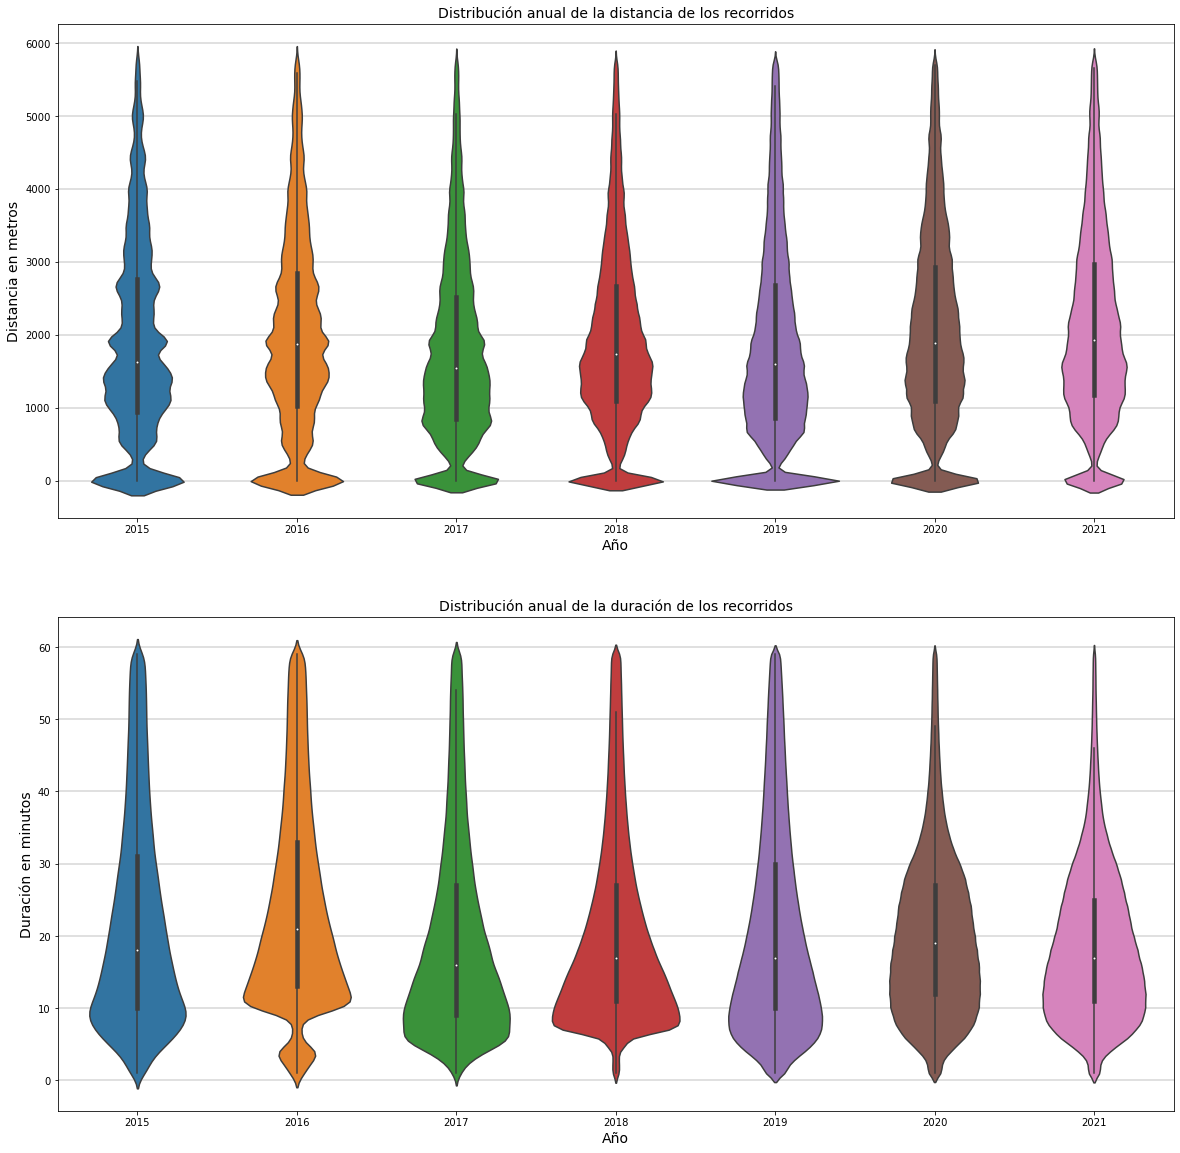

In [20]:
fig = plt.figure(figsize = (20,20))

# Axis 1 = distribución anual de la distancia de los recorridos
ax1 = plt.subplot(2, 1, 1)
sns.violinplot(data = dataset_distancia, x = "año", y = "distancia")
ax1.set_axisbelow(True)
ax1.yaxis.grid(which='major', color='black', lw=0.4, alpha=0.6, linestyle='-')    
plt.title('Distribución anual de la distancia de los recorridos', fontsize=14)
plt.ylabel('Distancia en metros', fontsize=14)
plt.xlabel('Año', fontsize=14)

# Axis 2 = distribución anual de la duración de los recorridos
ax2 = plt.subplot(2, 1, 2)
sns.violinplot(data = dataset, x = "año", y = "minutos")
ax2.set_axisbelow(True)
ax2.yaxis.grid(which='major', color='black', lw=0.4, alpha=0.6, linestyle='-')
plt.title('Distribución anual de la duración de los recorridos', fontsize=14)
plt.ylabel('Duración en minutos', fontsize=14)
plt.xlabel('Año', fontsize=14)

plt.savefig("Análisis de distancia y duración.jpg", dpi = 300)

## <u>3er gráfico: análisis de tipo de viaje</u>

In [21]:
dataset["misma_estacion"] = dataset.codigo_origen == dataset.codigo_destino
df_misma_estacion = dataset["misma_estacion"].value_counts().rename_axis(["valor"]).reset_index(name = "totales")
df_misma_estacion

,valor,totales
0,False,12638427
1,True,1330823


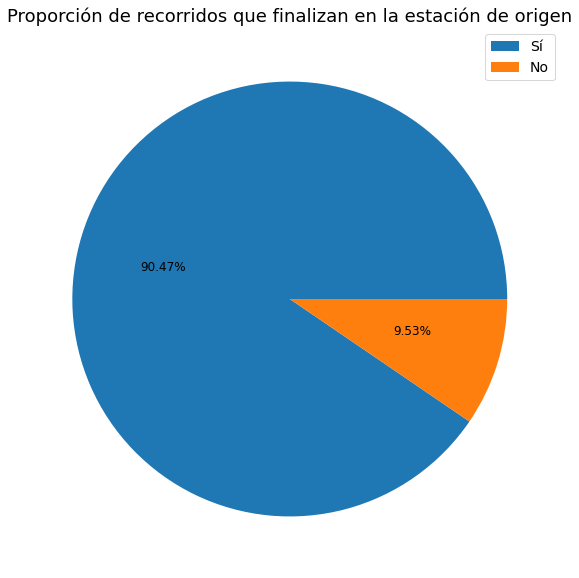

In [22]:
plt.figure(facecolor = 'white', figsize=(10, 10))
patches, texts = plt.pie(df_misma_estacion["totales"],
                         labels = [str(round(dataset["misma_estacion"].value_counts(normalize = True)[0]*100,2)) + "%", str(round(dataset["misma_estacion"].value_counts(normalize = True)[1]*100,2)) + "%"],
                         labeldistance = 0.5)
texts[0].set_fontsize(12)
texts[1].set_fontsize(12)
plt.title('Proporción de recorridos que finalizan en la estación de origen', fontsize=18)
plt.legend(["Sí", "No"], fontsize = 14)

plt.savefig("Análisis de tipo de viaje.jpg", dpi = 300)

## <u>4to gráfico: análisis de tipo de estaciones</u>

In [23]:
estaciones_requeridas_origen_porcentaje = round((dataset.loc[:,["codigo_origen"]].codigo_origen.value_counts(normalize = True)*100)[0:41],2)
estaciones_requeridas_origen_porcentaje = pd.DataFrame(estaciones_requeridas_origen_porcentaje.rename_axis("codigo_origen").reset_index(name = "porcentaje_recorridos"))
df_codigos_nombres_origen = dataset.loc[:,["codigo_origen", "nombre_origen"]]
df_codigos_nombres_origen.drop_duplicates(subset = ["codigo_origen"], inplace = True)
estaciones_requeridas_origen_porcentaje = estaciones_requeridas_origen_porcentaje.merge(df_codigos_nombres_origen, on = "codigo_origen", how = "left")
estaciones_requeridas_origen_porcentaje

,codigo_origen,porcentaje_recorridos,nombre_origen
0,14,1.40,pacifico
1,9,1.32,parque las heras
2,29,1.19,parque centenario
3,8,1.08,congreso
4,5,1.06,plaza italia
5,1,1.02,facultad de derecho
6,147,0.94,constitucion i
7,2,0.90,retiro
8,25,0.88,plaza guemes
9,30,0.85,pena


In [24]:
round(estaciones_requeridas_origen_porcentaje.porcentaje_recorridos.sum(),2)

30.4

In [25]:
estaciones_requeridas_destino_porcentaje = round((dataset.loc[:,["codigo_destino"]].codigo_destino.value_counts(normalize = True)*100)[0:41],2)
estaciones_requeridas_destino_porcentaje = pd.DataFrame(estaciones_requeridas_destino_porcentaje.rename_axis("codigo_destino").reset_index(name = "porcentaje_recorridos"))
df_codigos_nombres_destino = dataset.loc[:,["codigo_destino", "nombre_destino"]]
df_codigos_nombres_destino.drop_duplicates(subset = ["codigo_destino"], inplace = True)
estaciones_requeridas_destino_porcentaje = estaciones_requeridas_destino_porcentaje.merge(df_codigos_nombres_destino, on = "codigo_destino", how = "left")
estaciones_requeridas_destino_porcentaje

,codigo_destino,porcentaje_recorridos,nombre_destino
0,14,1.39,pacifico
1,9,1.32,parque las heras
2,29,1.20,parque centenario
3,1,1.08,facultad de derecho
4,8,1.07,congreso
5,5,1.02,plaza italia
6,147,0.93,constitucion i
7,25,0.87,plaza guemes
8,30,0.86,pena
9,69,0.84,ecuador


In [26]:
round(estaciones_requeridas_destino_porcentaje.porcentaje_recorridos.sum(),2)

30.47

In [27]:
estaciones_requeridas_origen = dataset.loc[:,["codigo_origen"]].codigo_origen.value_counts()[0:41]
estaciones_requeridas_origen = pd.DataFrame(estaciones_requeridas_origen.rename_axis("codigo_origen").reset_index(name = "cantidad_recorridos_origen"))
df_codigos_nombres_origen = dataset.loc[:,["codigo_origen", "nombre_origen"]]
df_codigos_nombres_origen.drop_duplicates(subset = ["codigo_origen"], inplace = True)
estaciones_requeridas_origen = estaciones_requeridas_origen.merge(df_codigos_nombres_origen, on = "codigo_origen", how = "left")
estaciones_requeridas_origen.rename(columns = {"codigo_origen" : "codigo"}, inplace = True)
estaciones_requeridas_origen

,codigo,cantidad_recorridos_origen,nombre_origen
0,14,195427,pacifico
1,9,184506,parque las heras
2,29,165564,parque centenario
3,8,150876,congreso
4,5,148100,plaza italia
5,1,142470,facultad de derecho
6,147,131421,constitucion i
7,2,126283,retiro
8,25,122574,plaza guemes
9,30,118304,pena


In [28]:
estaciones_requeridas_destino = dataset.loc[:,["codigo_destino"]].codigo_destino.value_counts()[0:41]
estaciones_requeridas_destino = pd.DataFrame(estaciones_requeridas_destino.rename_axis("codigo_destino").reset_index(name = "cantidad_recorridos_destino"))
df_codigos_nombres_destino = dataset.loc[:,["codigo_destino", "nombre_destino"]]
df_codigos_nombres_destino.drop_duplicates(subset = ["codigo_destino"], inplace = True)
estaciones_requeridas_destino = estaciones_requeridas_destino.merge(df_codigos_nombres_destino, on = "codigo_destino", how = "left")
estaciones_requeridas_destino.rename(columns = {"codigo_destino" : "codigo"}, inplace = True)
estaciones_requeridas_destino

,codigo,cantidad_recorridos_destino,nombre_destino
0,14,193660,pacifico
1,9,184263,parque las heras
2,29,167258,parque centenario
3,1,151387,facultad de derecho
4,8,149039,congreso
5,5,143144,plaza italia
6,147,129770,constitucion i
7,25,121936,plaza guemes
8,30,120200,pena
9,69,117979,ecuador


In [29]:
estaciones_requeridas = estaciones_requeridas_origen.merge(estaciones_requeridas_destino, on = "codigo", how = "left")
estaciones_requeridas.dropna(subset = ["cantidad_recorridos_destino", "nombre_destino"], inplace = True)
estaciones_requeridas

,codigo,cantidad_recorridos_origen,nombre_origen,cantidad_recorridos_destino,nombre_destino
0,14,195427,pacifico,193660.0,pacifico
1,9,184506,parque las heras,184263.0,parque las heras
2,29,165564,parque centenario,167258.0,parque centenario
3,8,150876,congreso,149039.0,congreso
4,5,148100,plaza italia,143144.0,plaza italia
5,1,142470,facultad de derecho,151387.0,facultad de derecho
6,147,131421,constitucion i,129770.0,constitucion i
7,2,126283,retiro,111062.0,retiro
8,25,122574,plaza guemes,121936.0,plaza guemes
9,30,118304,pena,120200.0,pena


In [30]:
# Cálculo de correlación con Pearson y Spearman para utilizar en el gráfico
corr, _ = pearsonr(estaciones_requeridas["cantidad_recorridos_origen"], estaciones_requeridas["cantidad_recorridos_destino"])
corr2, _ = spearmanr(estaciones_requeridas["cantidad_recorridos_origen"], estaciones_requeridas["cantidad_recorridos_destino"])

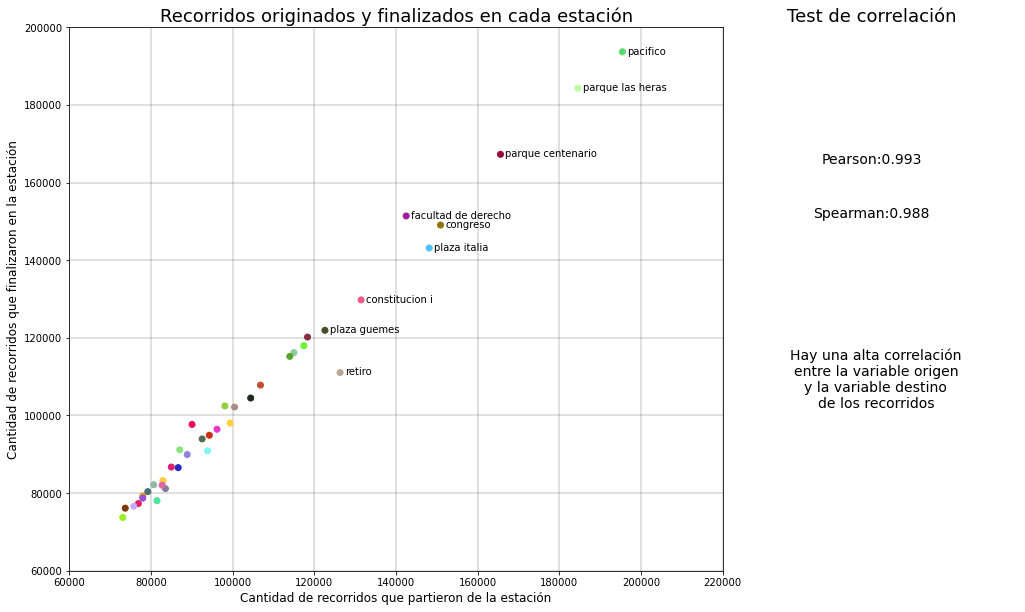

In [31]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (17,10), gridspec_kw={'width_ratios': [2.5, 0.8]})

# Creación de listado randomizado de colores
color_estaciones = []
for i in range(len(estaciones_requeridas)):
    color_estaciones.append('#%06X' % random.randint(0, 0xFFFFFF))

# Axis 1 = recorridos originados y finalizados en cada estación
ax1.scatter(estaciones_requeridas["cantidad_recorridos_origen"], estaciones_requeridas["cantidad_recorridos_destino"], color = color_estaciones)
ax1.set_xlabel("Cantidad de recorridos que partieron de la estación", fontsize = 12)
ax1.set_ylabel("Cantidad de recorridos que finalizaron en la estación", fontsize = 12)
ax1.set_title('Recorridos originados y finalizados en cada estación', fontsize=18)
ax1.grid(which='major', axis='y', color='black', lw=0.4, alpha=0.6)
ax1.grid(which='major', axis='x', color='black', lw=0.4, alpha=0.6)
ax1.set_axisbelow(True)
ax1.set_xlim(left = 60000, right = 220000)
ax1.set_ylim(bottom = 60000, top = 200000)
for i, txt in enumerate(estaciones_requeridas.loc[0:8, "nombre_origen"]):
    ax1.annotate(txt, (estaciones_requeridas.cantidad_recorridos_origen[i]+1200, estaciones_requeridas.cantidad_recorridos_destino[i]-600))



# Axis 2 = tests de correlación
ax2.set_title('Test de correlación', fontsize=18, x = 0.3)
ax2.set_axis_off()
ax2.text(0.06, 0.75, f'Pearson:{round(corr,3)}', fontsize = 14)
ax2.text(0.02, 0.65, f'Spearman:{round(corr2,3)}', fontsize = 14)
ax2.text(0.32, 0.3, 'Hay una alta correlación\nentre la variable origen\ny la variable destino\nde los recorridos', horizontalalignment='center', fontsize = 14)

plt.savefig("Análisis de correlación entre origen y destino.jpg", dpi = 300)

## <u>5to gráfico: análisis de usuario (edad)</u>

In [32]:
dataset_usuarios

,id_usuario,genero_usuario,edad_usuario,fecha_alta,hora_alta
0,7682,M,45.0,2015-02-28,17:32:55.087
1,19577,M,47.0,2015-02-28,17:33:12.227
2,108635,M,26.0,2015-02-28,17:35:13.800
3,129948,M,29.0,2015-02-28,17:35:42.780
4,129949,M,24.0,2015-02-28,17:35:42.780
...,...,...,...,...,...
5235,489,M,29.0,20-02-19,1:44:00 PM
5236,306,F,35.0,03-10-20,12:16:00 PM
5237,206,M,46.0,02-10-20,12:57:00 PM
5238,202,M,22.0,28-09-20,2:45:00 PM


In [33]:
q75,q25 = np.percentile(dataset_usuarios["edad_usuario"],[75,25])
iqr = q75-q25
max_limit = q75+(1.5*iqr)
min_limit = q25-(1.5*iqr)
print("límite superior:", max_limit, "\nlímite inferior:", min_limit)

límite superior: 63.5 
límite inferior: 3.5


In [34]:
# El límite superior no se utilizará pues podría eliminar información importante, se reemplaza por uno más lógico
max_limit = 90
dataset_usuarios_edad = dataset_usuarios.loc[(dataset_usuarios["edad_usuario"] < max_limit) & (dataset_usuarios["edad_usuario"]  > min_limit), :]
print("Se borraron", len(dataset_usuarios) - len(dataset_usuarios_edad), "outliers, quedando un total de", len(dataset_usuarios_edad), "valores válidos de edades entre 0 y 90 años")

Se borraron 69 outliers, quedando un total de 281306 valores válidos de edades entre 0 y 90 años


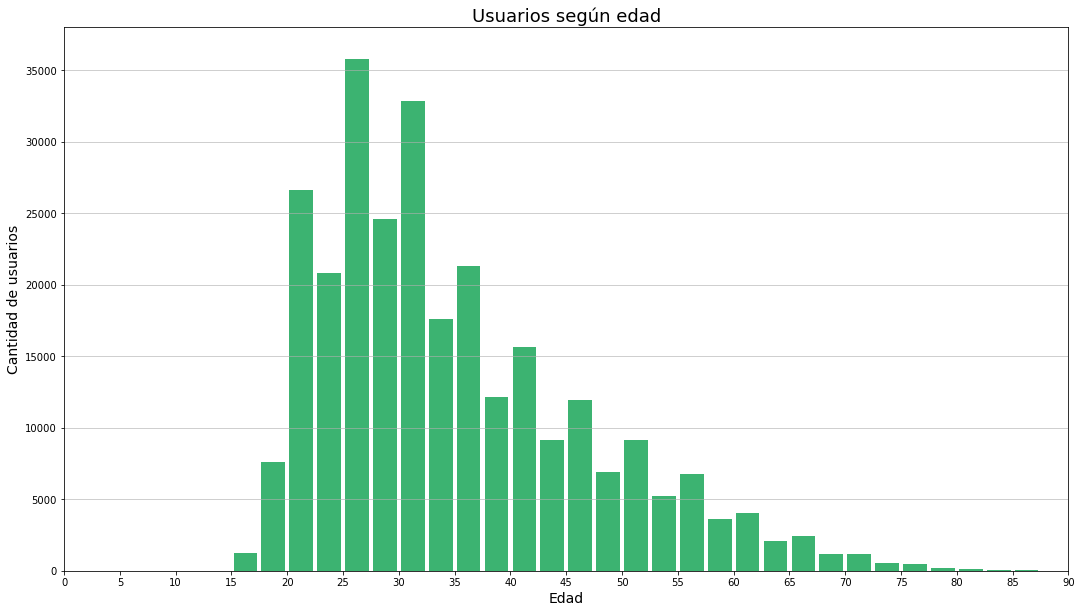

In [35]:
bin_list = np.arange(10, 100, 2.5)
plt.figure(figsize=(18, 10))
n, bins, patches = plt.hist(x = dataset_usuarios_edad.edad_usuario, bins = bin_list, color='mediumseagreen', rwidth=0.85)
maxfreq = n.max()
plt.rc('axes', axisbelow=True)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Edad', fontsize = 14)
plt.ylabel('Cantidad de usuarios', fontsize = 14)
plt.title('Usuarios según edad', fontsize = 18)
plt.ylim(ymax = 38000)
plt.xlim(xmax = 90)
plt.xticks(np.arange(0, 91, 5))

plt.savefig("Análisis de usuarios (edad).jpg", dpi = 300)

## <u>6to gráfico: análisis de usuario (cantidad de recorridos)</u>

In [36]:
dataset

,año,genero_usuario,codigo_origen,nombre_origen,long_estacion_origen,lat_estacion_origen,codigo_destino,nombre_destino,long_estacion_destino,lat_estacion_destino,id_usuario,minutos,distancia,misma_estacion
0,2015,M,25,plaza guemes,-58.416065,-34.589521,29,parque centenario,-58.434577,-34.608459,NaN,26,2701.351803,False
1,2015,F,17,plaza almagro,-58.418832,-34.606399,25,plaza guemes,-58.416065,-34.589521,NaN,57,1889.437650,False
2,2015,M,17,plaza almagro,-58.418832,-34.606399,25,plaza guemes,-58.416065,-34.589521,NaN,3,1889.437650,False
3,2015,M,29,parque centenario,-58.434577,-34.608459,25,plaza guemes,-58.416065,-34.589521,NaN,4,2701.351803,False
4,2015,M,29,parque centenario,-58.434577,-34.608459,25,plaza guemes,-58.416065,-34.589521,NaN,9,2701.351803,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13969245,2021,F,292,plaza bolivia,-58.436037,-34.563465,44,ecoparque,-58.414595,-34.575485,62246.0,12,2376.889972,False
13969246,2021,F,79,azucena villaflor,-58.363969,-34.611721,168,estados unidos,-58.381283,-34.618620,445201.0,23,1762.712401,False
13969247,2021,M,79,azucena villaflor,-58.363969,-34.611721,8,congreso,-58.389253,-34.609930,554162.0,19,2327.509455,False
13969248,2021,F,79,azucena villaflor,-58.363969,-34.611721,75,plaza primero de mayo,-58.398905,-34.612124,51005.0,17,3204.504684,False


In [37]:
dataset_usuarios_recorridos = dataset.dropna(subset = ["id_usuario"])
dataset_usuarios_recorridos = dataset_usuarios_recorridos.id_usuario.value_counts().rename_axis('id_usuario').reset_index(name='totales')
dataset_usuarios_recorridos

,id_usuario,totales
0,12434.0,1972
1,4240.0,1407
2,14239.0,1278
3,167637.0,1107
4,51346.0,1056
...,...,...
562352,177042.0,1
562353,577146.0,1
562354,577145.0,1
562355,177046.0,1


In [38]:
dataset_usuarios_recorridos.totales.value_counts()

1      95537
2      58162
3      40344
4      31522
5      25471
       ...  
651        1
650        1
647        1
646        1
512        1
Name: totales, Length: 662, dtype: int64

In [39]:
q75,q25 = np.percentile(dataset_usuarios_recorridos["totales"],[75,25])
iqr = q75-q25
max_limit = q75+(1.5*iqr)
min_limit = q25-(1.5*iqr)
print("límite superior:", max_limit, "\nlímite inferior:", min_limit)

límite superior: 52.0 
límite inferior: -28.0


In [40]:
# El límite superior no se utilizará pues podría eliminar información importante, se reemplaza por uno más lógico
max_limit = 1000
dataset_usuarios_recorridos_sin_outliers = dataset_usuarios_recorridos.loc[(dataset_usuarios_recorridos["totales"] < max_limit) & (dataset_usuarios_recorridos["totales"]  > min_limit), :]
print("Se borraron", len(dataset_usuarios_recorridos) - len(dataset_usuarios_recorridos_sin_outliers), "outliers, quedando un total de", len(dataset_usuarios_recorridos_sin_outliers), "usuarios que viajaron entre 0 y 1000 de edades entre 0 y 90 años")

Se borraron 8 outliers, quedando un total de 562349 usuarios que viajaron entre 0 y 1000 de edades entre 0 y 90 años


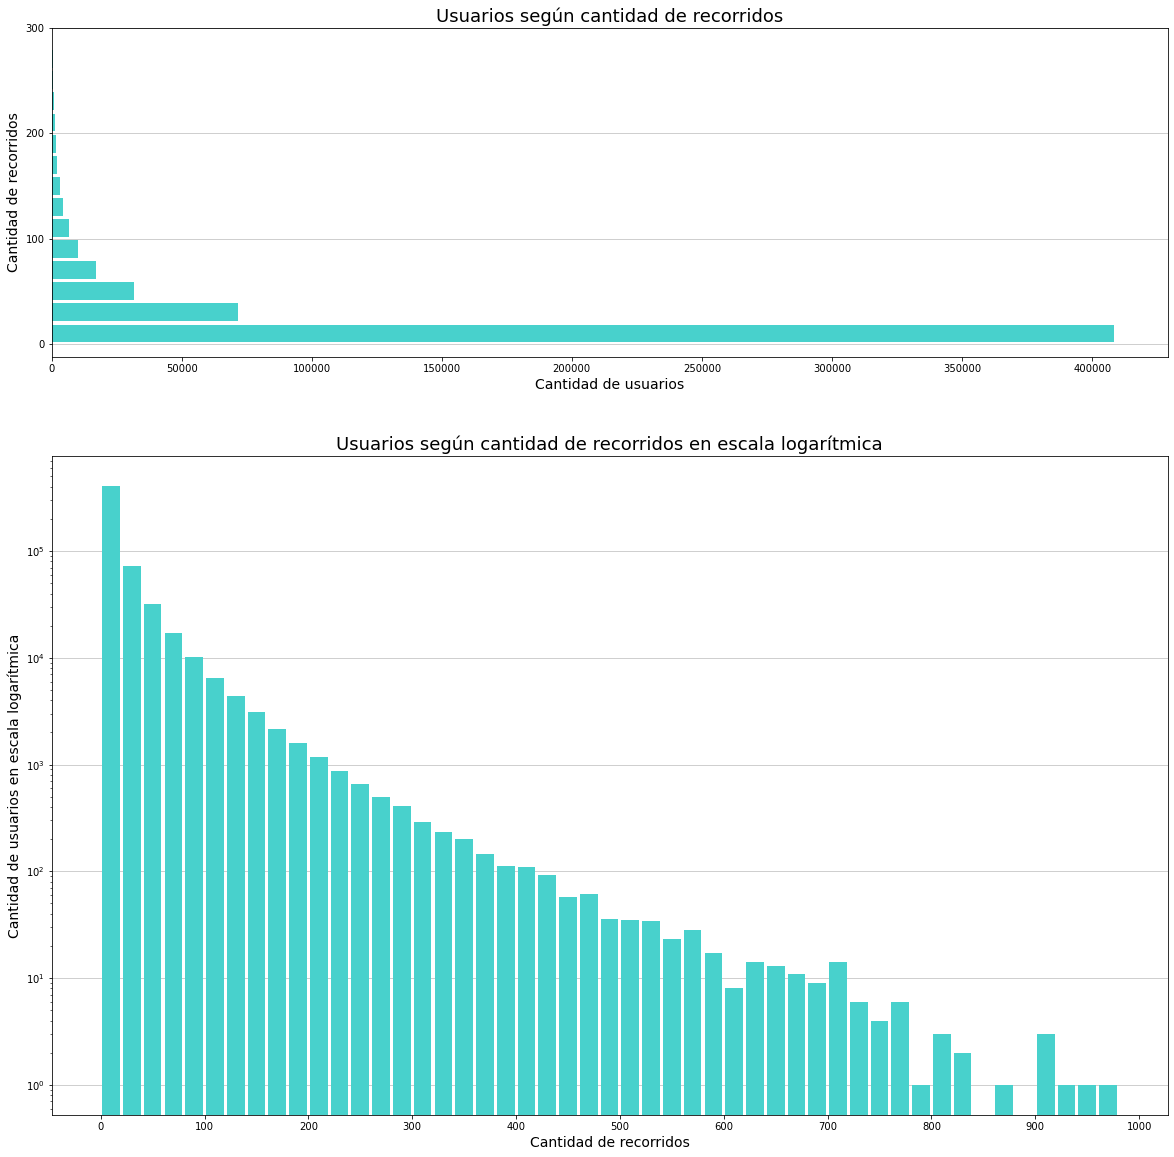

In [60]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize = (20,20), gridspec_kw={'height_ratios': [1, 2]})

# Axis 1 = usuarios según cantidad de recorridos
plt.sca(ax1)
bin_list = np.arange(0, 300, 20)
ax1, bins, patches = plt.hist(x = dataset_usuarios_recorridos_sin_outliers.totales, bins = bin_list, color='mediumturquoise', rwidth=0.85, orientation="horizontal")
maxfreq = ax1.max()
plt.rc('axes', axisbelow=True)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Cantidad de usuarios', fontsize = 14)
plt.ylabel('Cantidad de recorridos', fontsize = 14)
plt.title('Usuarios según cantidad de recorridos', fontsize = 18)
plt.yticks(np.arange(0, 301, 100))

# Axis 2 = usuarios según cantidad de viajes con escala logarítmica
plt.sca(ax2)
bin_list = np.arange(0, 1000, 20)
ax2, bins, patches = plt.hist(x = dataset_usuarios_recorridos_sin_outliers.totales, bins = bin_list, color='mediumturquoise', rwidth=0.85)
maxfreq = ax2.max()
plt.rc('axes', axisbelow=True)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Cantidad de recorridos', fontsize = 14)
plt.ylabel('Cantidad de usuarios en escala logarítmica', fontsize = 14)
plt.title('Usuarios según cantidad de recorridos en escala logarítmica', fontsize = 18)
plt.yscale("log")
plt.xticks(np.arange(0, 1001, 100))

plt.savefig("Análisis de usuarios (recorridos).jpg", dpi = 300)